In [1]:
#Building a simple workflow or graph using LangGraph
#STATE => It is basically the input schema  for all Nodes and Edges in the graph

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str

In [3]:
#Creating Nodes -> Nodes are just functions

def start_watch(state:State):
    print("Start Watch Node has been called")
    return {"graph_info":state["graph_info"]+"I am planning to watch "}

def movie(state:State):
    print("Movie node has been called")
    return{"graph_info":state["graph_info"]+"Movie"}

def series(state:State):
    print("Series node has been called")
    return{"graph_info":state["graph_info"]+"Series"}

In [4]:
import random
from typing import Literal

def random_watch(state:State) -> Literal['movie','series']:
    if random.random()>0.5:
        return "movie"
    else:
        return "series"

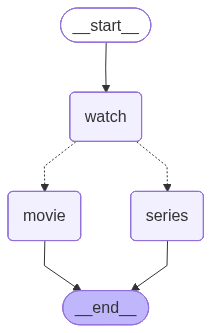

In [5]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

#Building Graph
graph=StateGraph(State)

#adding all the nodes
graph.add_node("watch",start_watch)
graph.add_node("movie",movie)
graph.add_node("series",series)

#Schedule the flow using edges
graph.add_edge(START,"watch")
graph.add_conditional_edges("watch",random_watch)
graph.add_edge("movie",END)
graph.add_edge("series",END)

#Compile the graph
graph_builder=graph.compile()

#View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [6]:
graph_builder.invoke({"graph_info":"My Name is Harnisha "})

Start Watch Node has been called
Movie node has been called


{'graph_info': 'My Name is Harnisha I am planning to watch Movie'}